# Single-run output analysis

This notebook will study the outputs of a single run of the CRAB model. This is for exploring the structure and dynamics of the output data, and serves as a testing environment for more meaningful plotting and analysis that will be used in [many_run_anal.ipynb](./many_run_anal.ipynb).

## Set-up & Loading Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# TODO: Consider moving notebook helpers (prints, plots) to notebook_helpers file
#       (pick a better name)

In [13]:
model_data = pd.read_csv('../results/model_vars_0.csv')
model_data = model_data.rename_axis('Step')
model_data.head()

,Flood,n_agents,n_households,n_c26_firms,n_ind_firms,n_cons_firms,n_trans_firms,n_agr_firms,n_priv_serv_firms,n_pub_serv_firms,n_pub_utilities_firms,n_retail_firms,HH consumption,Regional demand,Export demand,Unemployment rate,Min wage,Avg wage
Step,,,,,,,,,,,,,,,,,,
0,False,11301,10000,150,300,200,150,100,100,100,100,100,6519.444235,6519.443,0.0,0.87,0.600,0.999572
1,False,11301,10000,150,300,200,150,100,100,100,100,100,7401.544235,7401.543,0.0,0.68,0.600,1.037163
2,False,11301,10000,150,300,200,150,100,100,100,100,100,8417.640235,8417.640,0.0,0.48,0.624,1.038947
3,False,11301,10000,150,300,200,150,100,100,100,100,100,9202.873273,9202.872,0.0,0.29,0.624,1.041012
4,False,11301,10000,150,300,200,150,100,100,100,100,100,8906.889613,9242.888,0.0,0.32,0.624,1.038635


In [14]:
agent_data = pd.read_csv('../results/agent_vars_0.csv')
agent_data.head()

,Step,AgentID,Type,Net worth,Price,Market share,Prod,Inventories,N ordered,Production made,...,Sum past demand,Past demand,Real demand,Wage,Debt,Size,Supplier,Labor demand,KL ratio,Capital amount
0,1,1,<class 'CRAB_agents.C26'>,100.0,1.210,0.006667,1.086,1.09,0.0,1.09,...,3.0,1.0,0.0,1.011475,0.0,1.0,<CRAB_agents.C26 object at 0x7070037ce210>,1.0,1.0,80.0
1,1,2,<class 'CRAB_agents.C26'>,100.0,1.260,0.006667,1.053,1.05,0.0,1.05,...,3.0,1.0,0.0,1.020629,0.0,1.0,<CRAB_agents.C26 object at 0x7070037ce150>,1.0,1.0,76.0
2,1,3,<class 'CRAB_agents.C26'>,100.0,1.236,0.006667,1.067,1.07,0.0,1.07,...,3.0,1.0,0.0,1.014522,0.0,1.0,<CRAB_agents.C26 object at 0x70700324c290>,1.0,1.0,76.0
3,1,4,<class 'CRAB_agents.C26'>,100.0,1.260,0.006667,1.057,1.06,0.0,1.06,...,3.0,1.0,0.0,1.024574,0.0,1.0,<CRAB_agents.C26 object at 0x70700327e6d0>,1.0,1.0,72.0
4,1,5,<class 'CRAB_agents.C26'>,100.0,1.243,0.006667,1.039,1.04,0.0,1.04,...,3.0,1.0,0.0,0.994048,0.0,1.0,<CRAB_agents.C26 object at 0x7070032ac150>,1.0,1.0,76.0


## Model Data

This section will look at the model-level data captured for the model run.

### Extracting Data

In this section I'll explore what kind of data exists in each column and how it should be handled. First, let's look at the column names.

In [15]:
def print_col_info(data, stats=['name']):
    for col in data:
        outstr = ""
        if 'name' in stats:
            outstr += f"col: {col:>22}\t"
        if 'dtype' in stats:
            outstr += f"dtype: {str(model_data[col].dtype)}\t"
        if 'min' in stats:
            outstr += f"min: {np.min(model_data[col]): >8.2f}\t"
        if 'max' in stats:
            outstr += f"max: {np.max(model_data[col]): >8.2f}\t"
        if 'range' in stats:
            outstr += f"range: {np.ptp(model_data[col]): >8.2f}\t"
        print(outstr)

print_col_info(model_data, ['name', 'dtype'])

col:                  Flood	dtype: bool	
col:               n_agents	dtype: int64	
col:           n_households	dtype: int64	
col:            n_c26_firms	dtype: int64	
col:            n_ind_firms	dtype: int64	
col:           n_cons_firms	dtype: int64	
col:          n_trans_firms	dtype: int64	
col:            n_agr_firms	dtype: int64	
col:      n_priv_serv_firms	dtype: int64	
col:       n_pub_serv_firms	dtype: int64	
col:  n_pub_utilities_firms	dtype: int64	
col:         n_retail_firms	dtype: int64	
col:         HH consumption	dtype: float64	
col:        Regional demand	dtype: float64	
col:          Export demand	dtype: float64	
col:      Unemployment rate	dtype: float64	
col:               Min wage	dtype: float64	
col:               Avg wage	dtype: float64	


We have one Boolean variable, Flood, which we know indicates whether a flood occurred a timestep or not. We can extract the moments of flood as follows:

In [16]:
flood_ticks = model_data[model_data['Flood'] == True].index
flood_ticks

Index([40, 80], dtype='int64', name='Step')

For the integer columns, we can also look at the min, max, and range of the values:

In [17]:
numeric_model_data = model_data.select_dtypes(include=['int', 'float'])
print_col_info(numeric_model_data, ['name', 'min', 'max', 'range'])


col:               n_agents	min: 11301.00	max: 11301.00	range:     0.00	
col:           n_households	min: 10000.00	max: 10000.00	range:     0.00	
col:            n_c26_firms	min:   150.00	max:   150.00	range:     0.00	
col:            n_ind_firms	min:   300.00	max:   300.00	range:     0.00	
col:           n_cons_firms	min:   200.00	max:   200.00	range:     0.00	
col:          n_trans_firms	min:   150.00	max:   150.00	range:     0.00	
col:            n_agr_firms	min:   100.00	max:   100.00	range:     0.00	
col:      n_priv_serv_firms	min:   100.00	max:   100.00	range:     0.00	
col:       n_pub_serv_firms	min:   100.00	max:   100.00	range:     0.00	
col:  n_pub_utilities_firms	min:   100.00	max:   100.00	range:     0.00	
col:         n_retail_firms	min:   100.00	max:   100.00	range:     0.00	
col:         HH consumption	min:  6519.44	max: 10130.17	range:  3610.73	
col:        Regional demand	min:  6519.44	max: 10254.50	range:  3735.05	
col:          Export demand	min:     0.00	max:     

All of the int columns have a range of 0. We'll skip those that don't vary over the model run and carry forward the ones that do:

In [18]:
dynamic_cols = []
for col in numeric_model_data:
    if np.ptp(model_data[col]) > 0.0:
        dynamic_cols.append(col)

dynamic_model_data = numeric_model_data[dynamic_cols]
dynamic_model_data.head()

,HH consumption,Regional demand,Unemployment rate,Min wage,Avg wage
Step,,,,,
0,6519.444235,6519.443,0.87,0.600,0.999572
1,7401.544235,7401.543,0.68,0.600,1.037163
2,8417.640235,8417.640,0.48,0.624,1.038947
3,9202.873273,9202.872,0.29,0.624,1.041012
4,8906.889613,9242.888,0.32,0.624,1.038635


### Time Series Analysis

For now, just plotting.

In [19]:
def plot_timeseries(data, floods=None):
    """
    Plotting a single timeseries from CRAB model data
    
    Parameters:
    -----------
    data : pandas.DataFrame
        The DataFrame containing the time series data.
    floods : list, optional
        A list of flood times to be represented as vertical bars on the plot.

    Returns:
    --------
    None
    """
    # Setup
    sns.set_theme(style="white")
    plt.figure(figsize=(10, 6))
    
    # Add vertical bars to represent floods
    # TODO: Add flood_intensities argument to inform line style
    if floods is not None:
        for flood_time in floods:
            plt.axvline(x=flood_time, color='r', linestyle='--', linewidth=1)
    
    # Plot the timeseries
    sns.lineplot(data=data, linewidth=2)

    # Tweak visuals
    sns.despine()

    plt.show()

In [20]:
def plot_timeseries_subplots(data, floods=None, plt_height=5):
    """
    Plotting a multiple timeseries from CRAB model data in one figure
    
    Parameters:
    -----------
    data : pandas.DataFrame
        The DataFrame containing the time series data.
    floods : list, optional
        A list of flood times to be represented as vertical bars on the plot.
,   plt_height : int, optional
        Height of each plot for matplotlib. Defaults to 5

    Returns:
    --------
    None
    """
    n_ts = len(data.columns)

    # Setup
    sns.set_theme(style="white")
    fig, ax = plt.subplots(figsize=(10, plt_height*n_ts), ncols=1, nrows=n_ts)
    
    for i, col in enumerate(data):
        # Add vertical bars to represent floods
        # TODO: Add flood_intensities argument to inform line style
        #       (requires model to report flood intensity as an output alongside flood)
        if floods is not None:
            for flood_time in floods:
                ax[i].axvline(x=flood_time, color='r', linestyle='--', linewidth=1)
        
        # Plot the timeseries
        sns.lineplot(data=data[col], ax=ax[i], linewidth=2)# label=col)
        # TODO: Only show the x axis name ('Step') on the last plot.

    # Tweak visuals
    sns.despine()

    plt.show()

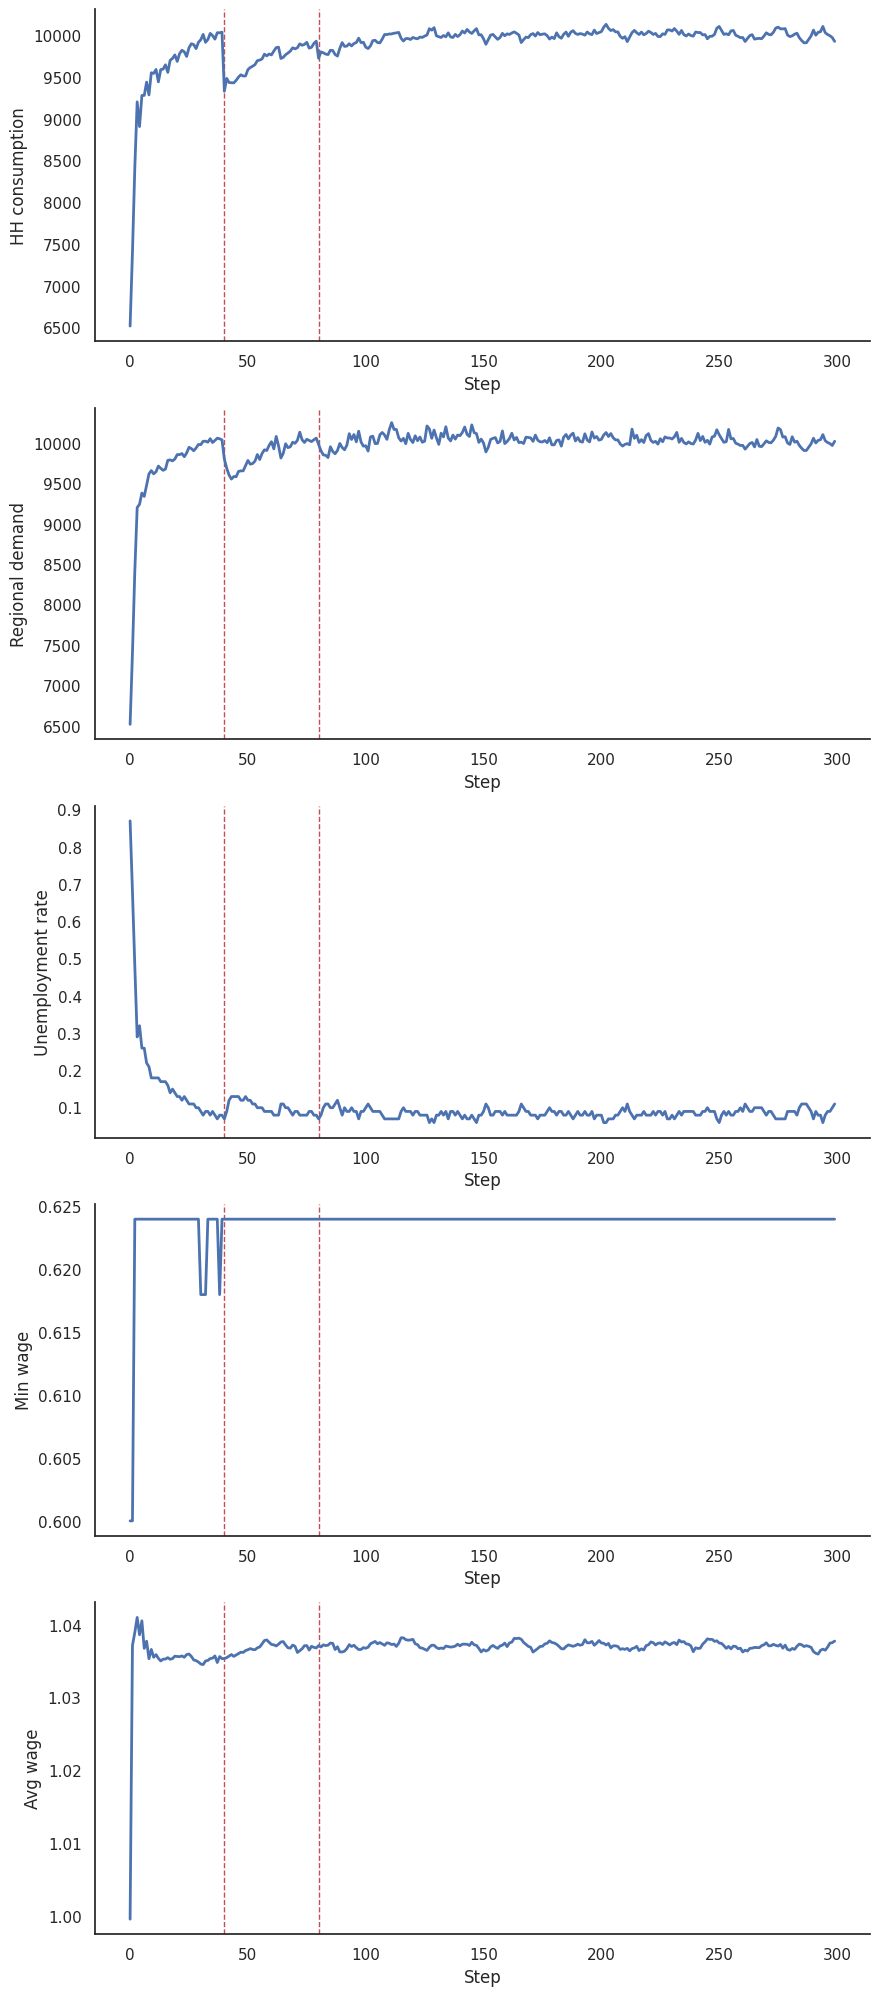

In [21]:
plot_timeseries_subplots(dynamic_model_data, flood_ticks)

## Agent Data

This section will look at the Agent-level data captured during the model run.